In [1]:
import os
import csv
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
!pip install seaborn

In [2]:
data_path = 'D:\\ML\\article_sort\\learn-ai-bbc\\BBC News Train.csv'

In [3]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(1490, 3)

In [4]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 1490
Number of columns in data = 3


**Sample data:**


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


Check for null values:

In [5]:
data_raw.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

Checking number of articles in each category:

In [6]:
# categories_list = data_raw['Category'].unique()
print(data_raw['Category'].value_counts())
print(data_raw['Category'].value_counts(normalize=True))

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64
sport            0.232215
business         0.225503
politics         0.183893
entertainment    0.183221
tech             0.175168
Name: Category, dtype: float64


**Normal Data Exploration**

<AxesSubplot: >

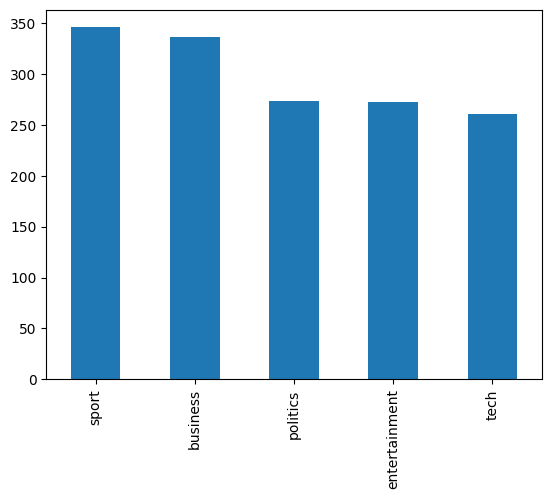

In [7]:
data_raw['Category'].value_counts().plot(kind='bar')

In [8]:
data_raw['Text'].where(data_raw['ArticleId'].duplicated()==False)

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

In [9]:
data_raw[data_raw[['Text', 'Category']].duplicated()==True]

,ArticleId,Text,Category
157,853,prince crowned top music earner prince earne...,entertainment
208,1022,format wars could confuse users technology f...,tech
271,302,fox attacks blair s tory lies tony blair lie...,politics
309,658,freeze on anti-spam campaign a campaign by lyc...,tech
494,1326,ask jeeves joins web log market ask jeeves has...,tech
503,497,microsoft gets the blogging bug software giant...,tech
529,1102,talks aim to avert pension strike talks aimed ...,politics
629,1464,digital guru floats sub-$100 pc nicholas negro...,tech
636,1049,de niro film leads us box office film star rob...,entertainment
637,427,bortolami predicts dour contest italy skipper ...,sport


In [10]:
data_raw = data_raw.drop_duplicates(subset=['Text', 'Category'])

In [11]:
data_raw.shape

(1440, 3)

**NLP Data Exploration**

In [12]:
# import nltk
# nltk.download('stopwords', download_dir=os.curdir)
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [13]:
from wordcloud import WordCloud

In [14]:
comment_words = ''
for val in data_raw['Text'][data_raw['Category']=='business']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [15]:
wordcloud = WordCloud(
        background_color='black',
        stopwords=stop,
        max_words=30,
        max_font_size=100,
        scale=5,
        random_state=1)

wordcloud=wordcloud.generate(str(comment_words))

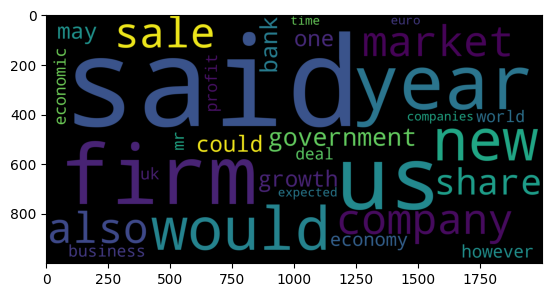

In [16]:
plt.imshow(wordcloud)

**Preprocessing**

In [20]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt', download_dir=os.curdir)
import re

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


In [21]:
word_tokenize(' i have had a  yes  from a couple of others should i need them. davies impressed during. ')

['i',
 'have',
 'had',
 'a',
 'yes',
 'from',
 'a',
 'couple',
 'of',
 'others',
 'should',
 'i',
 'need',
 'them',
 '.',
 'davies',
 'impressed',
 'during',
 '.']

In [22]:
print(re.sub(' +', ' ', ' i have had a  yes     from a couple'))
print(re.sub(r'[^\w\s]', '', ' i %^ & have had a  yes     from a couple'))
print(re.sub(r'[^a-zA-Z0-9\s]', '', ' I AM i %^ & have had a  yes     from a couple'))


 i have had a yes from a couple
 i   have had a  yes     from a couple
 I AM i   have had a  yes     from a couple


In [23]:
def cleaning(text):
    text = text.lower()
    text = re.sub(' +', ' ', text) # removing multiple spaces
    text = re.sub(r'[^\w\s]', '', text) # removing special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop]
    text = ' '.join(tokens)
    return text

In [24]:
cleaning('i have had a  yes  from a couple of others should i need them. davies impressed during. ')

'yes couple others need davies impressed'

In [25]:
data_raw['Text'] = data_raw['Text'].apply(cleaning)

In [26]:
data_raw['Text'].head()

0    worldcom exboss launches defence lawyers defen...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens maj...
3    lifestyle governs mobile choice faster better ...
4    enron bosses 168m payout eighteen former enron...
Name: Text, dtype: object

**Analysing tf-idf**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
def compute_tfidf(documents):
  # Create a TfidfVectorizer object
    tfidf_vectorizer = TfidfVectorizer()

    # Generate the tf-idf scores for the documents
    scores = tfidf_vectorizer.fit_transform(documents)

    # Return the scores as a dense numpy array
    return scores.toarray()

In [29]:
documents = [  "This is the first document",  "This document is the second document",  "And this is the third one",  "Is this the first document?"]

scores = compute_tfidf(documents)

In [30]:
scores

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

**Preprocessing**

In [146]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
data_raw['Category_nm'] = lbl_encoder.fit_transform(data_raw['Category'])

In [147]:
data_raw[['Category','Category_nm']].value_counts()

Category       Category_nm
sport          3              342
business       0              335
politics       2              266
entertainment  1              263
tech           4              234
dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from time import time
from sklearn.metrics import accuracy_score

In [34]:
tfidf_vectorizer = TfidfVectorizer(encoding = 'utf-8',
                             ngram_range = (1,2),
                             stop_words= None,          # We cleaned them already
                             lowercase = False,         # We converted all to lowercase
                             max_df = 0.95,
                             min_df = 10,
                             norm = 'l2',
                             sublinear_tf = True)


In [139]:
def logistic_regression(test_size=0.1):
    X_train, X_test, y_train, y_test = train_test_split(data_raw['Text'], data_raw['Category_nm'], test_size=test_size, random_state=42)
    t0 = time()
    tfidf_vectorizer.fit(X_train)
    X_train = tfidf_vectorizer.transform(X_train)
    y_train = lbl_encoder.fit_transform(y_train)
    X_test = tfidf_vectorizer.transform(X_test)
    y_test = lbl_encoder.transform(y_test)
    logistic_regression = LogisticRegression(C=1e5, multi_class='multinomial')
    lr_model = logistic_regression.fit(X_train, y_train)

    acc = accuracy_score(y_test, lr_model.predict(X_test))
    pred = lr_model.predict(X_test)
    print("done in %0.3fs." % (time() - t0))
    return acc, pred, y_test, lr_model

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data_raw['Text'], data_raw['Category_nm'], test_size=0.2, random_state=42)

In [39]:
lr_df = pd.DataFrame(columns = ['Test Size','Accuracy', 'Predictions', 'Test'])
for i in np.arange(0.1,1.0,0.1):
    acc, pred, test, lr_model = logistic_regression(i)
    lr_df.loc[len(lr_df.index)] = [i*100, acc, pred, test]
lr_df

done in 2.413s.
done in 1.949s.
done in 1.728s.
done in 2.048s.
done in 2.107s.
done in 1.101s.
done in 0.976s.
done in 0.811s.
done in 0.549s.


,Test Size,Accuracy,Predictions,Test
0,10.0,0.972222,"[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
1,20.0,0.982639,"[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
2,30.0,0.981524,"[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
3,40.0,0.979167,"[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
4,50.0,0.972222,"[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
5,60.0,0.967593,"[3, 2, 4, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
6,70.0,0.958375,"[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
7,80.0,0.946181,"[3, 2, 0, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."
8,90.0,0.905093,"[3, 2, 2, 3, 1, 3, 1, 2, 4, 2, 0, 0, 0, 4, 0, ...","[3, 2, 1, 3, 1, 3, 4, 2, 4, 2, 0, 0, 0, 4, 0, ..."


In [141]:
acc, pred, test, lr_model = logistic_regression(0.2)

done in 2.316s.


In [144]:
predict(lr_model, data_raw_2['Text'])

array([3], dtype=int64)

In [145]:
data_raw_2

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


**Saving Model**

In [46]:
import pickle
pickle.dump(lr_model, open('D:\ML\\article_sort\model\\trained_model.pkl','wb'))

**Load Model** 

In [91]:
trained_model = pickle.load(open('D:\ML\\article_sort\model\\trained_model.pkl','rb'))

**Testing Model**

In [132]:
data_path_2 = 'D:\\ML\\article_sort\\learn-ai-bbc\\BBC News Test.csv'
data_raw_2 = pd.read_csv(data_path_2)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw_2.shape

(735, 2)

In [133]:
data_raw_2.head

<bound method NDFrame.head of      ArticleId                                               Text
0         1018  qpr keeper day heads for preston queens park r...
1         1319  software watching while you work software that...
2         1138  d arcy injury adds to ireland woe gordon d arc...
3          459  india s reliance family feud heats up the ongo...
4         1020  boro suffer morrison injury blow middlesbrough...
..         ...                                                ...
730       1923  eu to probe alitalia  state aid  the european ...
731        373  u2 to play at grammy awards show irish rock ba...
732       1704  sport betting rules in spotlight a group of mp...
733        206  alfa romeos  to get gm engines  fiat is to sto...
734        471  citizenship event for 18s touted citizenship c...

[735 rows x 2 columns]>

In [88]:
fresh_data = ['bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions improving  as against 36% who said they were getting worse.  the poll of 22 953 people was conducted by the international polling firm globescan  together with the program on international policy attitudes (pipa) at the university of maryland.  while the world economy has picked up from difficult times just a few years ago  people seem to not have fully absorbed this development  though they are personally experiencing its effects   said pipa director steven kull.  people around the world are saying:  i m ok  but the world isn t .  there may be a perception that war  terrorism and religious and political divisions are making the world a worse place  even though that has not so far been reflected in global economic performance  says the bbc s elizabeth blunt.  the countries where people were most optimistic  both for the world and for their own families  were two fast-growing developing economies  china and india  followed by indonesia. china has seen two decades of blistering economic growth  which has led to wealth creation on a huge scale  says the bbc s louisa lim in beijing. but the results also may reflect the untrammelled confidence of people who are subject to endless government propaganda about their country s rosy economic future  our correspondent says. south korea was the most pessimistic  while respondents in italy and mexico were also quite gloomy. the bbc s david willey in rome says one reason for that result is the changeover from the lira to the euro in 2001  which is widely viewed as the biggest reason why their wages and salaries are worth less than they used to be. the philippines was among the most upbeat countries on prospects for respondents  families  but one of the most pessimistic about the world economy. pipa conducted the poll from 15 november 2004 to 3 january 2005 across 22 countries in face-to-face or telephone interviews. the interviews took place between 15 november 2004 and 5 january 2005. the margin of error is between 2.5 and 4 points  depending on the country. in eight of the countries  the sample was limited to major metropolitan areas.']

In [116]:
def predict(lr_model, fresh_data):
    fresh_data_df = pd.DataFrame(fresh_data, columns=['Text'])
    fresh_data_df['Text'] = fresh_data_df['Text'].apply(cleaning)
    fresh_data_df = tfidf_vectorizer.transform(fresh_data_df)
    # return trained_model.predict(fresh_data_df)
    return lr_model.predict(fresh_data_df)
    

In [117]:
predict(lr_model, data_raw_2['Text'])

array([3])

In [113]:
data_raw_2['Text']

0      qpr keeper day heads for preston queens park r...
1      software watching while you work software that...
2      d arcy injury adds to ireland woe gordon d arc...
3      india s reliance family feud heats up the ongo...
4      boro suffer morrison injury blow middlesbrough...
                             ...                        
730    eu to probe alitalia  state aid  the european ...
731    u2 to play at grammy awards show irish rock ba...
732    sport betting rules in spotlight a group of mp...
733    alfa romeos  to get gm engines  fiat is to sto...
734    citizenship event for 18s touted citizenship c...
Name: Text, Length: 735, dtype: object

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
X_train, X_test, y_train, y_test = train_test_split(data_raw['Text'], data_raw['Category'], test_size=0.2, random_state=42)
t0 = time()
tfidf_vectorizer.fit(X_train)
X_train = tfidf_vectorizer.transform(X_train)
y_train = lbl_encoder.fit_transform(y_train)
X_test = tfidf_vectorizer.transform(X_test)
y_test = lbl_encoder.transform(y_test)
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

In [138]:
X_train = data_raw['Text'].apply(cleaning)
y_train = data_raw['Category']
X_test = data_raw_2['Text']

In [136]:
predict(rf_model, data_raw_2['Text'])

ValueError: could not convert string to float: 'qpr keeper day heads for preston queens park rangers keeper chris day is set to join preston on a month s loan.  day has been displaced by the arrival of simon royce  who is in his second month on loan from charlton. qpr have also signed italian generoso rossi. r s manager ian holloway said:  some might say it s a risk as he can t be recalled during that month and simon royce can now be recalled by charlton.  but i have other irons in the fire. i have had a  yes  from a couple of others should i need them.   day s rangers contract expires in the summer. meanwhile  holloway is hoping to complete the signing of middlesbrough defender andy davies - either permanently or again on loan - before saturday s match at ipswich. davies impressed during a recent loan spell at loftus road. holloway is also chasing bristol city midfielder tom doherty.'